In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import os
import cv2

In [2]:
img = "birds.jpg"
original_img = plt.imread(img)

In [3]:
original_img.shape

(720, 1280, 3)

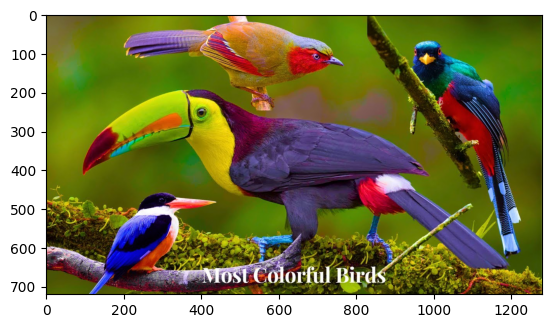

In [4]:
plt.imshow(original_img)

In [5]:
print(f"shape of original image: {original_img.shape}")

shape of original image: (720, 1280, 3)


In [6]:
# Reshaping the image into an m x 3 matrix where m = number of pixels(m X 4 for png image)
if original_img.shape[-1] == 4:
    X_img = original_img.reshape(-1,4)
else:
  X_img = original_img.reshape(-1,3)

In [7]:
X_img.shape

(921600, 3)

In [20]:
kmeans = KMeans(n_clusters = 15, n_init=10, max_iter=10)

In [21]:
kmeans.fit(X_img)

KMeans(max_iter=10, n_clusters=15, n_init=10)

In [22]:
print(f"Shape of centroids: {kmeans.cluster_centers_.shape}")
print(f"Shape of labels/index: {kmeans.labels_.shape}")
print("Closest centroid for the first five elements:", kmeans.labels_[:5])

Shape of centroids: (15, 3)
Shape of labels/index: (921600,)
Closest centroid for the first five elements: [7 7 7 7 7]


In [23]:
# Replace each pixel with the color of the closest centroid
X_recovered = kmeans.cluster_centers_[kmeans.labels_, : ]

# Reshape image into proper dimensions
X_recovered = X_recovered.reshape(original_img.shape)


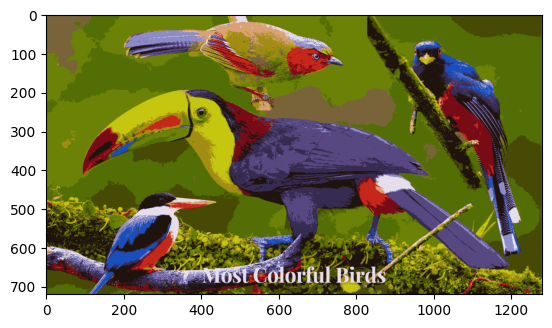

In [24]:
if original_img.shape[-1] == 4:
    plt.imshow(X_recovered)
else:
  plt.imshow(X_recovered/255)

In [25]:
def show_centroid_colors(centroids):
    if original_img.shape[-1] == 3:
      centroids = centroids/255
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)


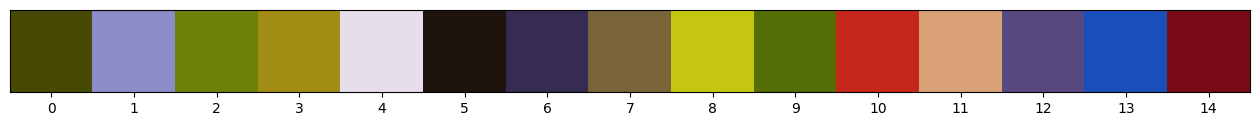

In [26]:
show_centroid_colors(kmeans.cluster_centers_)